In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ugradio
import pandas as pd

In [4]:
raw_data = pd.read_csv(r"5-2_curve_data.csv")

In [5]:
raw_data.shape

(2047, 1)

In [7]:
corrected_data = raw_data.T

In [11]:
print(corrected_data)

                           0     1         2     3         4     5     \
-1.000000000000000000e+00   1.0   1.0 -0.803922  -1.0  0.294118   1.0   

                               6     7         8     9     ...      2037  \
-1.000000000000000000e+00  0.113725  -1.0 -0.639216   1.0  ... -0.019608   

                           2038      2039  2040      2041  2042  2043  \
-1.000000000000000000e+00  -1.0 -0.498039   1.0  0.866667  -1.0  -1.0   

                              2044  2045      2046  
-1.000000000000000000e+00  0.85098   1.0 -0.490196  

[1 rows x 2047 columns]


In [35]:
ls = []
for i in range(0,2047):
    ls.append(corrected_data[i][0])
    
print(ls[:10])    

[1.0, 1.0, -0.8039215803146362, -1.0, 0.29411765933036804, 1.0, 0.11372549086809157, -1.0, -0.6392157077789307, 1.0]


In [34]:
corrected_data[][0]

1.0

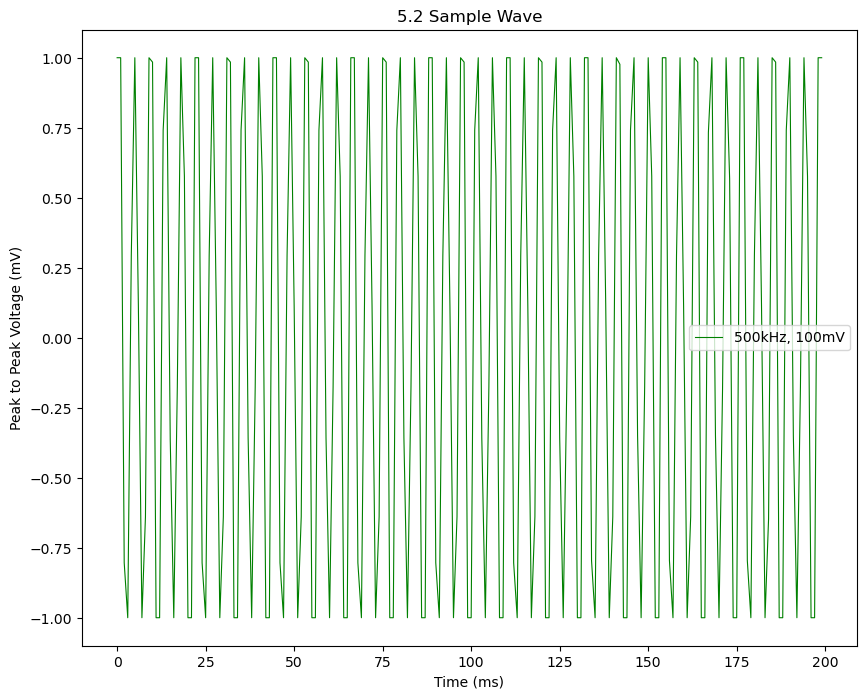

In [47]:
plt.figure(figsize=(10,8))
plt.plot(ls[:200], color='green', linewidth=0.8, label='500kHz, 100mV')
plt.xlabel('Time (ms)')
plt.ylabel('Peak to Peak Voltage (mV)')
plt.legend()
plt.title('5.2 Sample Wave')
plt.show()

In [49]:
fouriered_data = np.fft.fft(ls)

In [50]:
fouriered_data.shape

(2047,)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


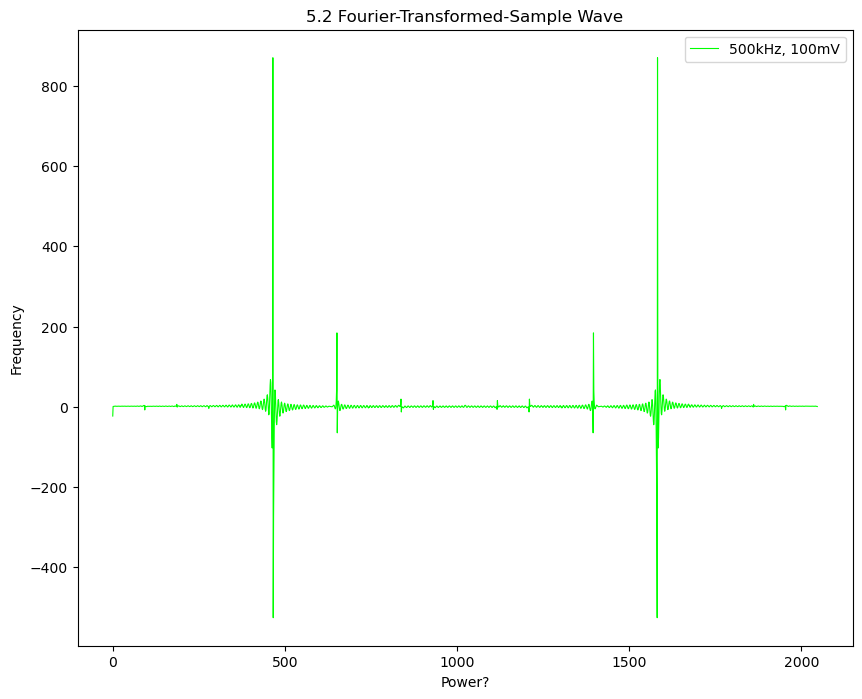

In [54]:
plt.figure(figsize=(10,8))
plt.plot(fouriered_data, color='lime', linewidth=0.8, label='500kHz, 100mV')
plt.xlabel('Power?')
plt.ylabel('Frequency')
plt.legend()
plt.title('5.2 Fourier-Transformed-Sample Wave')
plt.show()

In [55]:
# plt.imsave('Fourier-Transformed_5.2_Wave(raw).png')

TypeError: imsave() missing 1 required positional argument: 'arr'

In [6]:
aliased = np.load("aliased_data(500kHz,100mV,1attenuator).npz")

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


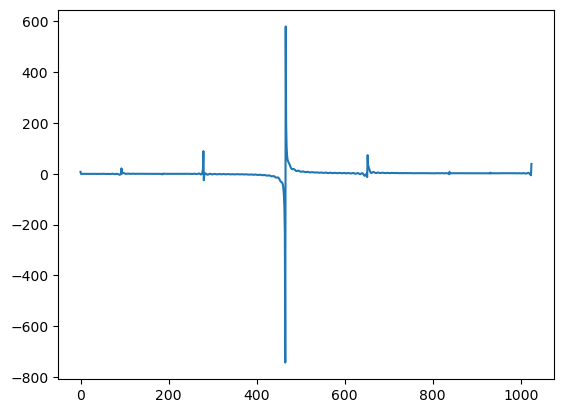

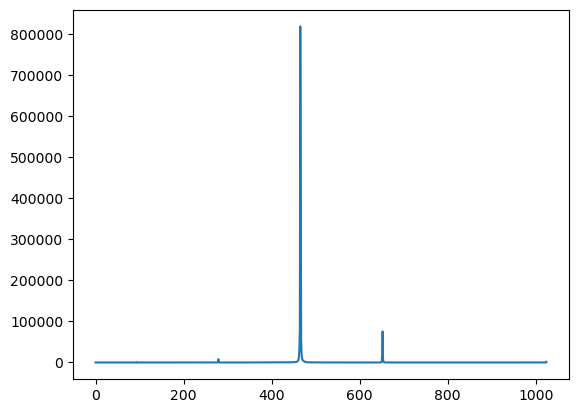

In [41]:
aliased["arr_0"]

aliased_fft = np.fft.rfft(aliased["arr_0"])
plt.plot((aliased["arr_1"][0:1025]),aliased_fft)
plt.show();

power_alias = np.abs(aliased_fft)**2
plt.plot((aliased["arr_1"][0:1025]),power_alias[0:1025])
plt.show();

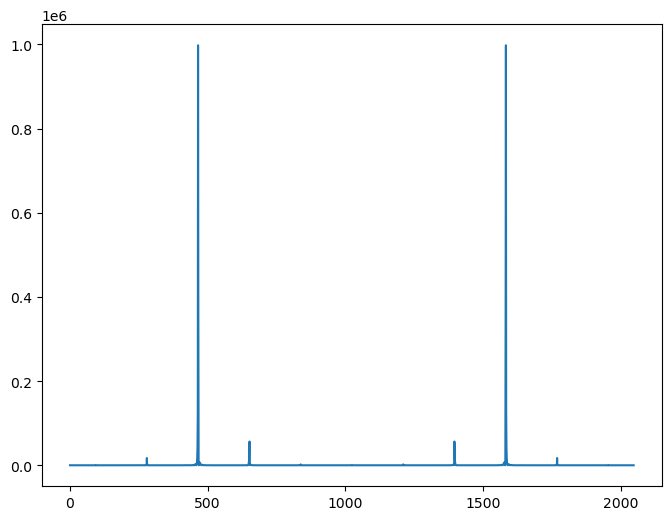

In [33]:
anti = np.load("anti_data(500kHz,100mV,1attenuator).npz")
anti["arr_0"]

anti_fft = np.fft.rfft(anti["arr_0"])
anti_rfft = np.fft.fft(anti["arr_0"])
power_anti = np.abs(anti_rfft)**2

plt.figure(figsize=(8,6))
#plt.grid()
plt.plot(power_anti)
#plt.plot((aliased["arr_1"][0:1025]),aliased_fft)
#plt.plot((anti["arr_1"][0:1025]),anti_fft)
plt.show();

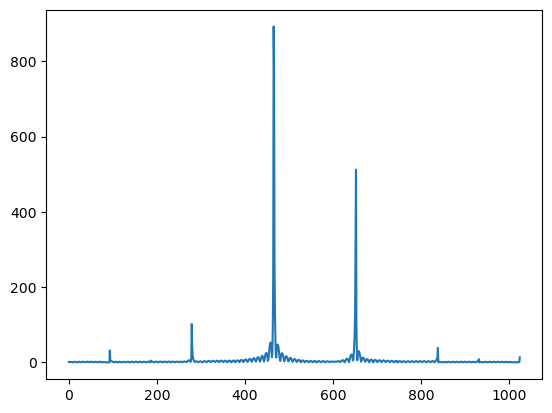

In [25]:
diff = np.abs(anti_fft - aliased_fft)
plt.plot((aliased["arr_1"][0:1025]),diff)
plt.show()